Hello! My name is Aria and I'm a big NBA fan. That's why I decided working on different cool things with NBA-related datasets. I hope you enjoy this notebook. This notebook is performed on a dataset which consists information about the performance of a single players in a NBA match,including his team, different kind of shots attempts and shots made, rebounds and etc. Lets import necessary libraries and observe the first few rows.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('../input/game-detailscsv/games_details.csv')
data1=data.copy()  #have a copy to avoid manipulating original dataset
data.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,42000102,1610612764,WAS,Washington,203078,Bradley Beal,F,NaN,34:36,14.0,...,0.0,4.0,4.0,3.0,1.0,0.0,1.0,0.0,33.0,-22.0
1,42000102,1610612764,WAS,Washington,1629060,Rui Hachimura,F,NaN,25:50,4.0,...,2.0,5.0,7.0,1.0,0.0,0.0,3.0,4.0,11.0,-6.0
2,42000102,1610612764,WAS,Washington,203458,Alex Len,C,NaN,12:11,3.0,...,3.0,2.0,5.0,0.0,1.0,0.0,0.0,2.0,6.0,-11.0
3,42000102,1610612764,WAS,Washington,203526,Raul Neto,G,NaN,19:19,2.0,...,1.0,2.0,3.0,1.0,0.0,0.0,0.0,2.0,4.0,-17.0
4,42000102,1610612764,WAS,Washington,201566,Russell Westbrook,G,NaN,29:07,2.0,...,2.0,4.0,6.0,11.0,0.0,0.0,4.0,0.0,10.0,-16.0


as you can see, this dataset has 28 columns and not all of them are visible on the screen. So I take a look at first 14 columns and seconds 14 columns seperately to see what columns we have, and then I will do some adjustments on so,

In [2]:
data1.iloc[:,0:15].head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT
0,42000102,1610612764,WAS,Washington,203078,Bradley Beal,F,NaN,34:36,14.0,28.0,0.500,1.0,6.0,0.167
1,42000102,1610612764,WAS,Washington,1629060,Rui Hachimura,F,NaN,25:50,4.0,6.0,0.667,1.0,1.0,1.000
2,42000102,1610612764,WAS,Washington,203458,Alex Len,C,NaN,12:11,3.0,5.0,0.600,0.0,0.0,0.000
3,42000102,1610612764,WAS,Washington,203526,Raul Neto,G,NaN,19:19,2.0,5.0,0.400,0.0,2.0,0.000
4,42000102,1610612764,WAS,Washington,201566,Russell Westbrook,G,NaN,29:07,2.0,10.0,0.200,0.0,3.0,0.000


In [3]:
data1.iloc[:,15:28].head()

,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,4.0,6.0,0.667,0.0,4.0,4.0,3.0,1.0,0.0,1.0,0.0,33.0,-22.0
1,2.0,3.0,0.667,2.0,5.0,7.0,1.0,0.0,0.0,3.0,4.0,11.0,-6.0
2,0.0,0.0,0.000,3.0,2.0,5.0,0.0,1.0,0.0,0.0,2.0,6.0,-11.0
3,0.0,0.0,0.000,1.0,2.0,3.0,1.0,0.0,0.0,0.0,2.0,4.0,-17.0
4,6.0,10.0,0.600,2.0,4.0,6.0,11.0,0.0,0.0,4.0,0.0,10.0,-16.0


Now, we have a better grasp of what our columns indicate. Some columns might be useless e.g. Team_ID or even TEAM_CITY! At the other hand, some columns (features) might be redundant. For example, FT_PCT (free throw percentage) is naturally equal to FTM/FTA (free throw made/free throw attempt), so it doesn't give new insights. Lets rename some of the columns with long names and drop some trivia columns.

In [4]:
data1= data1.rename(columns = {'TEAM_ABBREVIATION':'Team','START_POSITION':'Pos'})
data1.drop(['GAME_ID','COMMENT','TEAM_ID','PLAYER_ID','TEAM_CITY'],axis=1,inplace=True)
data1.head()

,Team,PLAYER_NAME,Pos,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,WAS,Bradley Beal,F,34:36,14.0,28.0,0.500,1.0,6.0,0.167,...,0.0,4.0,4.0,3.0,1.0,0.0,1.0,0.0,33.0,-22.0
1,WAS,Rui Hachimura,F,25:50,4.0,6.0,0.667,1.0,1.0,1.000,...,2.0,5.0,7.0,1.0,0.0,0.0,3.0,4.0,11.0,-6.0
2,WAS,Alex Len,C,12:11,3.0,5.0,0.600,0.0,0.0,0.000,...,3.0,2.0,5.0,0.0,1.0,0.0,0.0,2.0,6.0,-11.0
3,WAS,Raul Neto,G,19:19,2.0,5.0,0.400,0.0,2.0,0.000,...,1.0,2.0,3.0,1.0,0.0,0.0,0.0,2.0,4.0,-17.0
4,WAS,Russell Westbrook,G,29:07,2.0,10.0,0.200,0.0,3.0,0.000,...,2.0,4.0,6.0,11.0,0.0,0.0,4.0,0.0,10.0,-16.0


In [5]:
#average number of rebounds
data1.REB.mean()

4.05641058464594

As you can see, now we have a briefer dataset. Its time to see if we have null cells. We fill null cells with the exact same value in the next cell of the column, and fill the rest of null cells by zero.

In [6]:
data1.isnull().sum()

Team                0
PLAYER_NAME         0
Pos            379831
MIN            100049
FGM            100049
FGA            100049
FG_PCT         100049
FG3M           100049
FG3A           100049
FG3_PCT        100049
FTM            100049
FTA            100049
FT_PCT         100049
OREB           100049
DREB           100049
REB            100049
AST            100049
STL            100049
BLK            100049
TO             100049
PF             100049
PTS            100049
PLUS_MINUS     123710
dtype: int64

In [7]:
data1=data1.fillna(method='bfill', axis=0).fillna(0)  #filling the null cells

We start to investigate few simple things about our data and the players. Lets see the most turnovers made by a single player in a match. Turnover is the number of times a players looses the ball in the game.

In [8]:
most_to = data1.sort_values(by=['TO'], ascending=False)
most_to.head(10)

# as you see in the TO column, some players had 12 turnovers in a game, which is too high!

,Team,PLAYER_NAME,Pos,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
151791,BOS,Paul Pierce,G,44:46,12.0,21.0,0.571,1.0,4.0,0.250,...,1.0,12.0,13.0,6.0,2.0,0.0,12.0,3.0,35.0,0.0
345396,WAS,Gilbert Arenas,G,42:09,7.0,20.0,0.350,3.0,7.0,0.429,...,0.0,5.0,5.0,8.0,3.0,0.0,12.0,2.0,21.0,-9.0
200854,PHI,Allen Iverson,G,44:35,10.0,25.0,0.400,2.0,8.0,0.250,...,0.0,6.0,6.0,5.0,4.0,1.0,12.0,3.0,33.0,-20.0
505957,HOU,James Harden,G,43:15,2.0,11.0,0.182,0.0,3.0,0.000,...,2.0,4.0,6.0,5.0,3.0,0.0,12.0,5.0,14.0,-4.0
136895,MIA,Dwyane Wade,G,42:25,9.0,20.0,0.450,0.0,1.0,0.000,...,0.0,4.0,4.0,5.0,3.0,2.0,12.0,0.0,41.0,12.0
459663,HOU,James Harden,G,40:32,7.0,13.0,0.538,3.0,8.0,0.375,...,0.0,6.0,6.0,15.0,2.0,1.0,12.0,4.0,29.0,-12.0
386004,HOU,James Harden,G,47:21,17.0,32.0,0.531,7.0,15.0,0.467,...,1.0,7.0,8.0,13.0,3.0,0.0,11.0,4.0,54.0,7.0
410994,IND,Ben Moore,F,39:55,11.0,17.0,0.647,0.0,2.0,0.000,...,0.0,10.0,10.0,11.0,4.0,1.0,11.0,0.0,26.0,12.0
410993,IND,Ike Anigbogu,F,39:55,11.0,17.0,0.647,0.0,2.0,0.000,...,0.0,10.0,10.0,11.0,4.0,1.0,11.0,0.0,26.0,12.0
103329,LAL,Kobe Bryant,G,47:15,12.0,25.0,0.480,2.0,4.0,0.500,...,3.0,7.0,10.0,5.0,2.0,1.0,11.0,2.0,39.0,3.0


One of my favorite players is Paul Pierce, lets take a look at his performance seperately.

In [9]:
# all rows of a single player
data1[data1.PLAYER_NAME=='Paul Pierce'].head()

,Team,PLAYER_NAME,Pos,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
54337,BOS,Paul Pierce,F,38:35,4.0,13.0,0.308,1.0,5.0,0.200,...,0.0,2.0,2.0,3.0,0.0,0.0,1.0,2.0,16.0,-21.0
54373,BOS,Paul Pierce,F,41:11,6.0,14.0,0.429,0.0,3.0,0.000,...,0.0,9.0,9.0,5.0,0.0,0.0,3.0,3.0,17.0,-10.0
54457,BOS,Paul Pierce,F,40:05,6.0,11.0,0.545,0.0,1.0,0.000,...,1.0,8.0,9.0,8.0,2.0,0.0,0.0,3.0,19.0,1.0
54541,BOS,Paul Pierce,F,32:16,9.0,15.0,0.600,1.0,1.0,1.000,...,0.0,3.0,3.0,4.0,0.0,0.0,2.0,5.0,27.0,-6.0
54637,BOS,Paul Pierce,F,38:14,6.0,15.0,0.400,1.0,3.0,0.333,...,0.0,3.0,3.0,6.0,3.0,0.0,2.0,2.0,27.0,-15.0


In [10]:
Paul_Pierce=data1[data1.PLAYER_NAME=='Paul Pierce']
Paul_Pierce[["PTS"]].mean()

#He gets 17.5 points per game on average, which is a highly competitive number!

PTS    17.529822
dtype: float64

Lets examine the number of unique values per each column. It can help have a better grasp of the games and the teams!

In [11]:
data1.nunique()
#It says 34 uniques teams. As we know NBA has only 30 teams at the moment, which tells us 4 teams have been moved to a new city and are not active anymore, which is common thing to happen in NBA

Team             34
PLAYER_NAME    2410
Pos               4
MIN            3385
FGM              26
FGA              47
FG_PCT          308
FG3M             15
FG3A             25
FG3_PCT         105
FTM              27
FTA              33
FT_PCT          162
OREB             18
DREB             25
REB              32
AST              26
STL              11
BLK              13
TO               13
PF                8
PTS              66
PLUS_MINUS      105
dtype: int64

In [12]:
#Best average Field goal percentages of each player
FG_per = data1.groupby("PLAYER_NAME", as_index=False)[["FG_PCT"]].mean().sort_values(by="FG_PCT", ascending=False)
FG_per.head(10)

#some players have 100% perc, maybe because they only played in one game or few minutes!

,PLAYER_NAME,FG_PCT
1236,Julian Khazzouh,1.0
23,Ademola Okulaja,1.0
1096,Jeremy Wise,1.0
660,Dontaye Draper,1.0
1739,Nik Caner-Medley,1.0
1724,Nick Sheppard,1.0
1692,Myck Kabongo,1.0
1639,Michelle Snow,1.0
53,Alex Hamilton,1.0
1526,Marcus Hubbard,1.0


Lets observe the distribution of the Field Goal Percentage. In periods of 5 games, we split each player's games into 5 games periods and plot the distribution of FG_PCT for three of the greatest players in the game.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

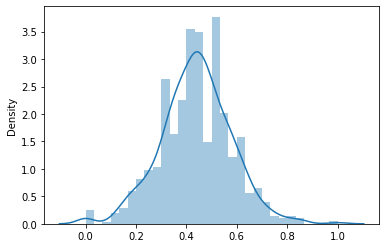

In [13]:
#distribution of perfoarmance of a player
import seaborn as sns
def perc_log(name,size):
    perc = data[data1.PLAYER_NAME==name].groupby("GAME_ID")["FG_PCT"].mean().values
    percents = perc[:(len(perc)//size)*size].reshape(-1, size)
    return sns.distplot(percents)
perc_log('James Harden',5)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

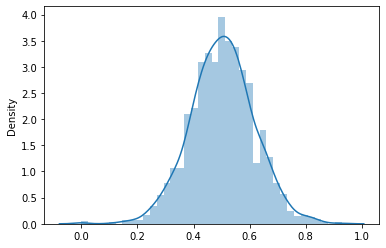

In [14]:
perc_log('LeBron James',5)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

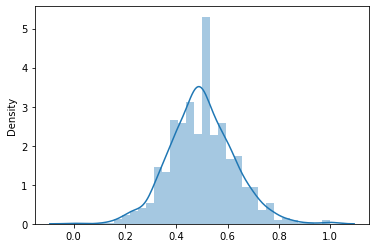

In [15]:
perc_log('Kevin Durant',5)

In [16]:
# good 3 pointers with perc over 0.5
data_3Sh=data1[data1["FG3_PCT"]>0.5]
data_3Sh.tail()

,Team,PLAYER_NAME,Pos,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
615587,LAL,Steve Nash,0,15,2.0,3.0,0.667,1.0,1.0,1.000,...,0.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,5.0,0.0
615589,GSW,Brandon Rush,0,17,2.0,3.0,0.667,2.0,2.0,1.000,...,0.0,3.0,3.0,0.0,0.0,1.0,1.0,2.0,9.0,0.0
615599,GSW,Klay Thompson,0,26,7.0,11.0,0.636,4.0,6.0,0.667,...,0.0,3.0,3.0,4.0,1.0,0.0,1.0,2.0,18.0,0.0
615601,GSW,Richard Jefferson,0,16,2.0,3.0,0.667,2.0,2.0,1.000,...,1.0,4.0,5.0,2.0,0.0,1.0,0.0,3.0,9.0,0.0
615617,DEN,Corey Brewer,0,22,7.0,8.0,0.875,2.0,2.0,1.000,...,2.0,1.0,3.0,0.0,1.0,0.0,3.0,6.0,16.0,0.0


In [17]:
#Total number of assists for players of each position, in total: Forwards have to most assists in total 
data1.groupby(by="Pos", dropna=False)[["AST"]].sum()

,AST
Pos,
0,4545.0
C,74224.0
F,819724.0
G,429289.0


In [18]:
# Same fo the Number of Field Goal attempts in total
data1.groupby(by="Pos", dropna=False)[["FG3A"]].sum()

,FG3A
Pos,
0,4207.0
C,28521.0
F,1022300.0
G,374627.0


In [19]:
#Lets seperate the forward players from the whole dataset:
indices = np.where([data1.Pos == 'F'])[1]
forwards=data1.loc[indices]
forwards.head()

,Team,PLAYER_NAME,Pos,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,WAS,Bradley Beal,F,34:36,14.0,28.0,0.500,1.0,6.0,0.167,...,0.0,4.0,4.0,3.0,1.0,0.0,1.0,0.0,33.0,-22.0
1,WAS,Rui Hachimura,F,25:50,4.0,6.0,0.667,1.0,1.0,1.000,...,2.0,5.0,7.0,1.0,0.0,0.0,3.0,4.0,11.0,-6.0
5,WAS,Davis Bertans,F,23:43,0.0,4.0,0.000,0.0,4.0,0.000,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,6.0,0.0,-11.0
6,WAS,Ish Smith,F,23:20,5.0,14.0,0.357,0.0,2.0,0.000,...,0.0,1.0,1.0,3.0,0.0,0.0,1.0,1.0,10.0,-10.0
7,WAS,Daniel Gafford,F,20:00,3.0,4.0,0.750,0.0,0.0,0.000,...,4.0,2.0,6.0,1.0,1.0,1.0,1.0,1.0,11.0,-1.0


In [20]:
# Lets see which forward player scored the most points in one game:
column = forwards["PTS"]
max_index = column.idxmax()
forwards.loc[max_index]

#Jeff Adrein scored 62 points in a game!

Team                   CHA
PLAYER_NAME    Jeff Adrien
Pos                      F
MIN                  38:39
FGM                   23.0
FGA                   35.0
FG_PCT               0.657
FG3M                   6.0
FG3A                  11.0
FG3_PCT              0.545
FTM                   10.0
FTA                   10.0
FT_PCT                 1.0
OREB                   1.0
DREB                  12.0
REB                   13.0
AST                    0.0
STL                    0.0
BLK                    0.0
TO                     0.0
PF                     1.0
PTS                   62.0
PLUS_MINUS            34.0
Name: 560348, dtype: object

In [21]:
#Top 10 most points:
forwards['PTS'].nlargest(10)

560348    62.0
560349    62.0
560350    62.0
560351    62.0
554017    61.0
554018    61.0
554019    61.0
4299      60.0
470960    60.0
470961    60.0
Name: PTS, dtype: float64

Lets see the distribution of number of players in different posts in the dataset. Not to mention that players are not equally distributed in different posts, number of forwards are the most and number of centers are the least.

<AxesSubplot:ylabel='None'>

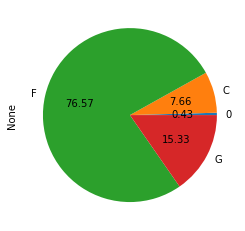

In [22]:
data1.groupby('Pos').size().plot(kind='pie', autopct='%.2f')
#76 percents are forwards!

In [23]:
#See which player has the best plus-minus in a single game:
column = data1["PLUS_MINUS"]
max_index = column.idxmax()
data1.loc[max_index]

Team                        HOU
PLAYER_NAME    Luc Mbah a Moute
Pos                           F
MIN                       25:43
FGM                         5.0
FGA                         5.0
FG_PCT                      1.0
FG3M                        3.0
FG3A                        3.0
FG3_PCT                     1.0
FTM                         0.0
FTA                         0.0
FT_PCT                      0.0
OREB                        0.0
DREB                        4.0
REB                         4.0
AST                         1.0
STL                         4.0
BLK                         0.0
TO                          2.0
PF                          3.0
PTS                        13.0
PLUS_MINUS                 57.0
Name: 422492, dtype: object

Sometimes we need to define a new feature (column) based on two or three other columns in the dataset. The new features can bring new insight about the data. Lets define a simple feature based on offensive and defensive rebounds.

In [24]:
#rato of offensive to defensive rebound
data1['rebound_ratio']=data1['OREB']/data1['DREB']
#finding the highest ratio (first, remove the rows with zero denominator)
data_not_inf= data1[data1.DREB!=0]
column = data_not_inf['rebound_ratio']
max_index = column.idxmax()
data_not_inf.loc[max_index]

Team                            CLE
PLAYER_NAME      Zydrunas Ilgauskas
Pos                               C
MIN                           27:10
FGM                             7.0
FGA                            18.0
FG_PCT                        0.389
FG3M                            0.0
FG3A                            0.0
FG3_PCT                         0.0
FTM                             4.0
FTA                             6.0
FT_PCT                        0.667
OREB                           12.0
DREB                            1.0
REB                            13.0
AST                             1.0
STL                             1.0
BLK                             4.0
TO                              0.0
PF                              3.0
PTS                            18.0
PLUS_MINUS                     22.0
rebound_ratio                  12.0
Name: 203444, dtype: object

In [25]:
#Seperating the entire rows of Philadelphia team players (their team id is PHI)
#Seperating a team
indices = np.where([data1.Team == 'PHI'])[1]
Ph_players=data1.loc[indices]
Ph_players.head()

,Team,PLAYER_NAME,Pos,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,rebound_ratio
14,PHI,Danny Green,F,21:44,2.0,3.0,0.667,1.0,2.0,0.500,...,1.0,2.0,2.0,0.0,2.0,1.0,2.0,5.0,8.0,1.000000
15,PHI,Tobias Harris,F,23:17,9.0,13.0,0.692,1.0,3.0,0.333,...,9.0,9.0,1.0,1.0,0.0,1.0,2.0,19.0,11.0,0.000000
16,PHI,Joel Embiid,C,26:17,8.0,12.0,0.667,3.0,4.0,0.750,...,7.0,7.0,3.0,0.0,0.0,1.0,1.0,22.0,19.0,0.000000
17,PHI,Seth Curry,G,23:04,4.0,7.0,0.571,1.0,4.0,0.250,...,0.0,0.0,3.0,0.0,0.0,0.0,2.0,9.0,19.0,NaN
18,PHI,Ben Simmons,G,28:34,11.0,15.0,0.733,0.0,0.0,0.000,...,7.0,9.0,8.0,2.0,1.0,2.0,1.0,22.0,18.0,0.285714


In [26]:
# Which Philly player has the most scoring number in a game?
column=Ph_players['PTS']
a=column.argmax()
Ph_players.iloc[a]

# Of course the great Allen Iverson with 60 points!

Team                       PHI
PLAYER_NAME      Allen Iverson
Pos                          G
MIN                      42:01
FGM                       17.0
FGA                       36.0
FG_PCT                   0.472
FG3M                       2.0
FG3A                       5.0
FG3_PCT                    0.4
FTM                       24.0
FTA                       27.0
FT_PCT                   0.889
OREB                       1.0
DREB                       3.0
REB                        4.0
AST                        6.0
STL                        5.0
BLK                        1.0
TO                         3.0
PF                         1.0
PTS                       60.0
PLUS_MINUS                27.0
rebound_ratio         0.333333
Name: 204305, dtype: object

Now we are ready for the most interesting part! I want to use machine learning to predict the Post of the players, based on couple of our columns. Do you think Post of the player has anything to do with his rebounds, 3point shots or assists? Lets see! We uuse KNN and Decision trees to investigate this. But don't expect super hight accuracies like 99 percent! Anthing abouve 50 or 60% can be satisfying for this model, as there is not a very strong relationship necessarilly between the vairables.

In [27]:
#Selecting few columns as features to classify different positions as our labels

goodplayers_ind = (data1["PTS"] >5) & (data1["FGA"] >3) & (data1["FG_PCT"] >0.2) & (data1["Pos"] !=0)
#we removed the players with too bad stats to avoid impacting our models. You can see them as outliers!
good_players=data1.loc[goodplayers_ind,:]
good_players.head()

,Team,PLAYER_NAME,Pos,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,rebound_ratio
0,WAS,Bradley Beal,F,34:36,14.0,28.0,0.500,1.0,6.0,0.167,...,4.0,4.0,3.0,1.0,0.0,1.0,0.0,33.0,-22.0,0.0
1,WAS,Rui Hachimura,F,25:50,4.0,6.0,0.667,1.0,1.0,1.000,...,5.0,7.0,1.0,0.0,0.0,3.0,4.0,11.0,-6.0,0.4
2,WAS,Alex Len,C,12:11,3.0,5.0,0.600,0.0,0.0,0.000,...,2.0,5.0,0.0,1.0,0.0,0.0,2.0,6.0,-11.0,1.5
6,WAS,Ish Smith,F,23:20,5.0,14.0,0.357,0.0,2.0,0.000,...,1.0,1.0,3.0,0.0,0.0,1.0,1.0,10.0,-10.0,0.0
7,WAS,Daniel Gafford,F,20:00,3.0,4.0,0.750,0.0,0.0,0.000,...,2.0,6.0,1.0,1.0,1.0,1.0,1.0,11.0,-1.0,2.0


In [28]:
#Defining out features and labels
features= good_players[["DREB","FG3A","AST"]]
label=good_players[["Pos"]]
features.head()

,DREB,FG3A,AST
0,4.0,6.0,3.0
1,5.0,1.0,1.0
2,2.0,0.0,0.0
6,1.0,2.0,3.0
7,2.0,0.0,1.0


In [29]:
#Process of standardization of our features

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])
features_standard = num_pipeline.fit_transform(features)
features_standard

array([[ 0.01045874,  1.04980376,  0.09366792],
       [ 0.37195323, -0.74236441, -0.67019951],
       [-0.71253025, -1.10079805, -1.05213323],
       ...,
       [ 2.54092018, -1.10079805,  2.3852702 ],
       [-0.71253025,  0.69137012, -1.05213323],
       [ 0.73344772,  1.04980376,  0.09366792]])

In [30]:
features_dataframe = pd.DataFrame(features_standard, columns = ['DREB','FG3A','AST'])
features_dataframe.head(), label.head()

(       DREB      FG3A       AST
 0  0.010459  1.049804  0.093668
 1  0.371953 -0.742364 -0.670200
 2 -0.712530 -1.100798 -1.052133
 3 -1.074025 -0.383931  0.093668
 4 -0.712530 -1.100798 -0.670200,
   Pos
 0   F
 1   F
 2   C
 6   F
 7   F)

In [31]:
#number of each position in our labels (as you see this data is not balanced category-wise)
label.value_counts()

Pos
F      275287
G       79687
C       35425
dtype: int64

In [32]:
#split to train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_dataframe,label, test_size = 0.2,random_state = 88, shuffle= True)
y_train.shape,y_test.shape

((312319, 1), (78080, 1))

In [33]:
#KNN model

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 50, metric = 'minkowski', p = 1)
knn.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(n_neighbors=50, p=1)

In [34]:
pred=knn.predict_proba(X_test)
pred[1]
#The numbers indicate the probabilities of each label for the test data

array([0.02, 0.56, 0.42])

In [35]:
pred=pd.DataFrame(pred)
pred_class=knn.predict(X_test)
pred_class=pd.DataFrame(pred_class)
pred_class.value_counts()

F    68595
G     7884
C     1601
dtype: int64

In [36]:
#evaluating the confustion matrix and accuracy

predict=knn.predict(X_train)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
confusion_matrix(y_train, predict), accuracy_score(y_train,predict)

(array([[  3510,  24581,    231],
        [  2932, 206281,  10897],
        [    13,  43147,  20727]]),
 0.7380850988892766)

73 percent accurqcy is not bad!

In [37]:
#Lets try with cross validation
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(knn, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred), accuracy_score(y_train,y_train_pred)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:862: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:862: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:862: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


(array([[  3819,  24259,    244],
        [  3426, 205740,  10944],
        [    18,  43784,  20085]]),
 0.735286678043923)

In [38]:
predict_test=knn.predict(X_test)
accuracy_score(y_test,predict_test)

0.7351306352459016

In [39]:
#This time we use Decision Tree models
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Dt = DecisionTreeClassifier()
Dt.fit(X_train,y_train)
tree_predict = Dt.predict(X_train)
tree_predict1=Dt.predict(X_test)
accuracy_score(y_train, tree_predict),accuracy_score(y_test,tree_predict1)

(0.7427149805167153, 0.7369620901639344)

again 73 percent accuracy is satisfying!

In the last part of the notbook, lets use grid search to find the proper hyperparameters for our knn and decision tree model. Grid search helps us find the bes hyperparameters to run our models.

In [40]:
#using grid search on knn to find best hyperparameters

from sklearn.model_selection import GridSearchCV
grid_params= {
    'n_neighbors':[5,10,20,40],
    'weights': ['uniform','distance'],
    'metric': ['euclidean','manhattan']
}
search=GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose=1,
    cv=3,
    n_jobs=-1
)
search_results=search.fit(X_train,y_train)

search_results.best_score_, search_results.best_estimator_, search_results.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  3.4min finished
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


(0.7343901659815626,
 KNeighborsClassifier(metric='euclidean', n_neighbors=40),
 {'metric': 'euclidean', 'n_neighbors': 40, 'weights': 'uniform'})

In [41]:
#using grid search on decision tree to find best hyperparameters

param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
search_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3)
search1_results=search_tree.fit(X_train,y_train)
search1_results.best_score_, search1_results.best_estimator_, search1_results.best_params_

(0.7382259807183237,
 DecisionTreeClassifier(criterion='entropy', max_depth=9),
 {'criterion': 'entropy', 'max_depth': 9})

We are predicting the post of the player based on three features with 74 percent, which is acceptable

**Conclusion:**

In this notebook, we studied some simple aspects of our NBA players dataset. We showed sport data analytics can use these datasets to know how each player performs. At the end, we deployed decision tree and knn machine learning models to predict Pos of players based on few of our columns. I would love to find more sophisticated data to study more complicated knowledge about the game!